In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Dataset
df = pd.read_csv(r"C:\Users\Quoc Khang\Videos\DA E-COM\Dataset3.csv", encoding="latin1")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Year,Product
0,1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,2019,Critical Illness Coverage
1,2,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,2019,Vision Exams and Eyewear
2,3,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,2019,"Prescription Drugs Coverage, Hospitalization C..."
3,4,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0,2019,"Surgery Coverage, Emergency Room Visits, Mater..."
4,5,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0,2019,"Pediatric Services, Physical Therapy Coverage"


**1. Gender vs Response**

In [4]:
gender_response_count = df.groupby(['Gender', 'Response']).size().unstack(fill_value=0)
gender_response_percent = gender_response_count.div(gender_response_count.sum(axis=1), axis=0) * 100

combined_df = gender_response_count.copy()
combined_df['0 (%)'] = gender_response_percent[0]
combined_df['1 (%)'] = gender_response_percent[1]

combined_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

print("Count and Percentage of Responses by Gender")
print(combined_df)

Count and Percentage of Responses by Gender
        0 (Count)  1 (Count)      0 (%)      1 (%)
Gender                                            
Female     156835      18185  89.609759  10.390241
Male       177564      28525  86.158893  13.841107


<Figure size 1400x700 with 0 Axes>

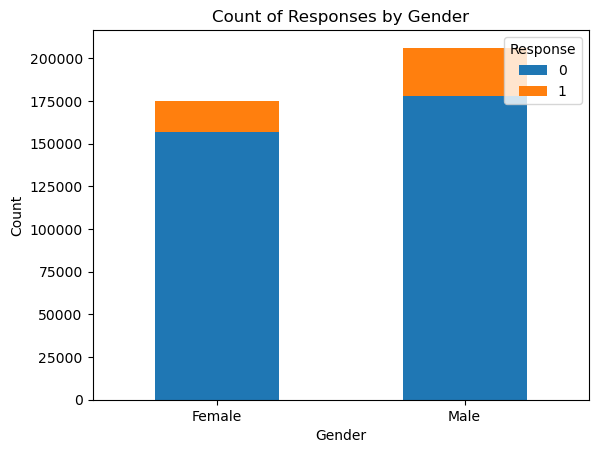

<Figure size 1400x700 with 0 Axes>

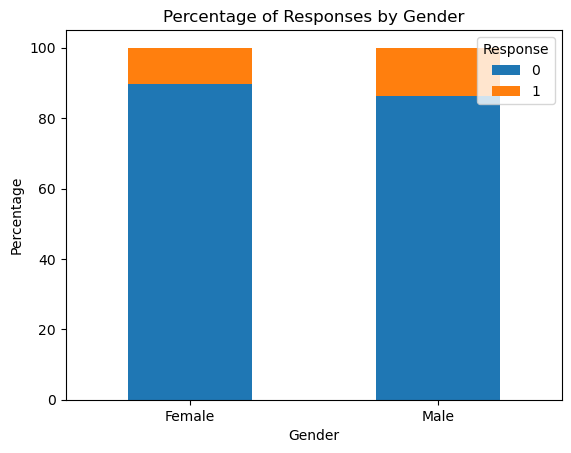

In [7]:
#Counts
plt.figure(figsize=(14, 7))
gender_response_count.plot(kind='bar', stacked=True)
plt.title('Count of Responses by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

#Percentages
plt.figure(figsize=(14, 7))
gender_response_percent.plot(kind='bar', stacked=True)
plt.title('Percentage of Responses by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

**2. Age vs Response**

In [5]:
age_response_count = df.groupby(['Age', 'Response']).size().unstack(fill_value=0)
age_response_percent = age_response_count.div(age_response_count.sum(axis=1), axis=0) * 100

combined_age_df = age_response_count.copy()
combined_age_df['0 (%)'] = age_response_percent[0]
combined_age_df['1 (%)'] = age_response_percent[1]

combined_age_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

print("Count and Percentage of Responses by Age")
print(combined_age_df)

Count and Percentage of Responses by Age
     0 (Count)  1 (Count)       0 (%)     1 (%)
Age                                            
20        6061        171   97.256098  2.743902
21       15883        574   96.512123  3.487877
22       20201        763   96.360427  3.639573
23       23364        892   96.322559  3.677441
24       25047        913   96.483051  3.516949
..         ...        ...         ...       ...
81          52          4   92.857143  7.142857
82          28          1   96.551724  3.448276
83          21          1   95.454545  4.545455
84          11          0  100.000000  0.000000
85          11          0  100.000000  0.000000

[66 rows x 4 columns]


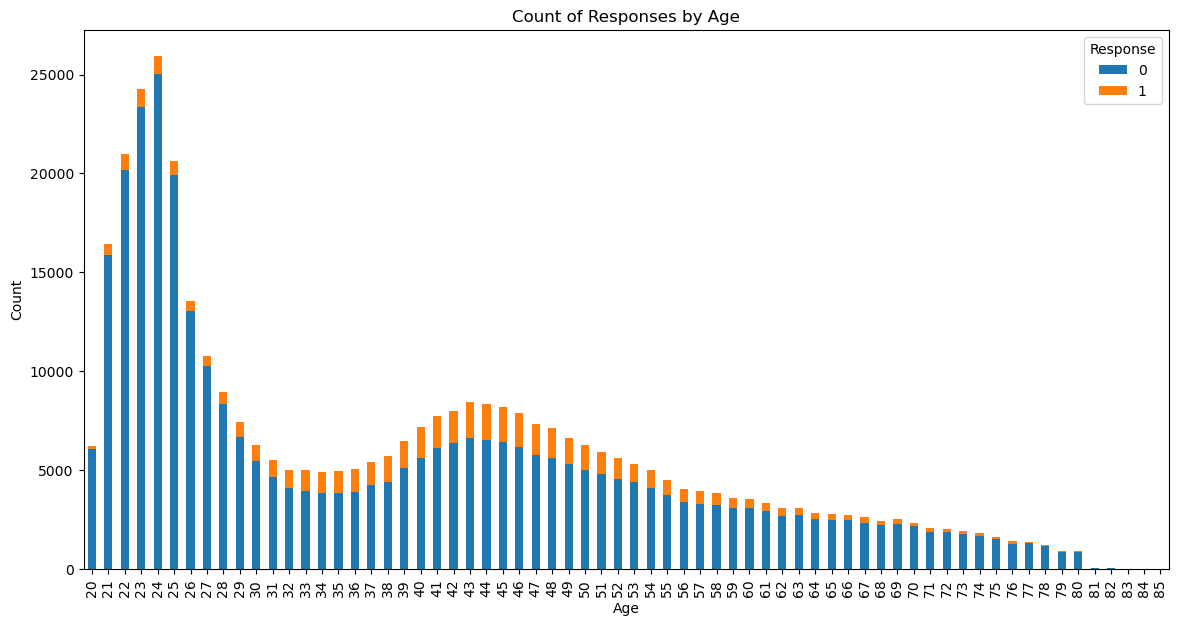

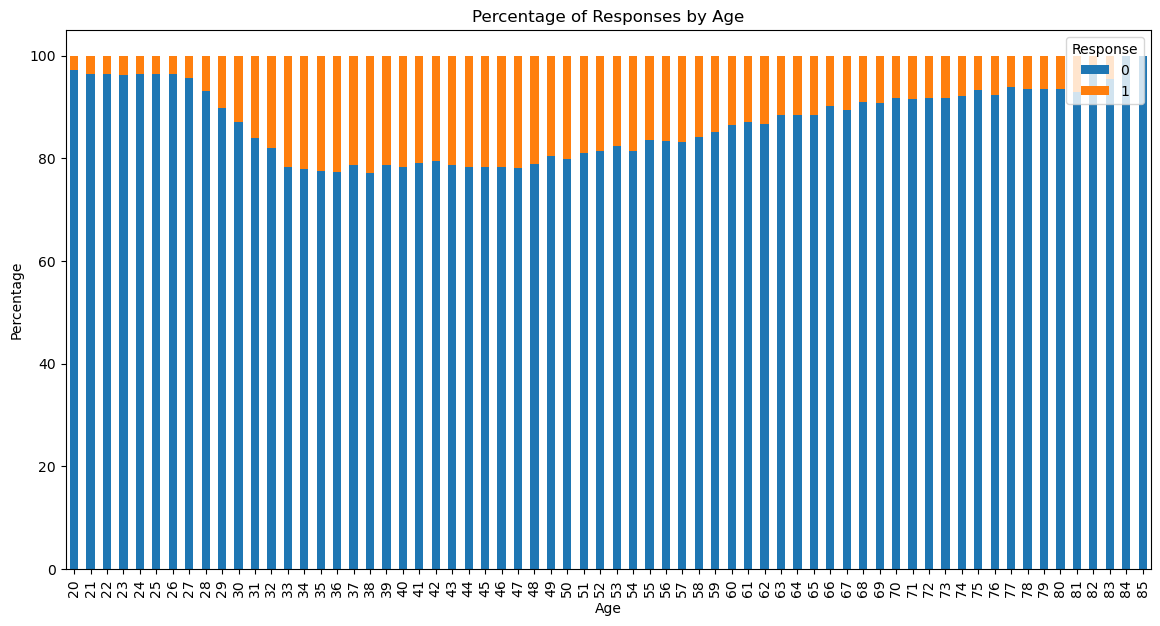

In [9]:
#Counts
plt.figure(figsize=(14, 7))
age_response_count.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Count of Responses by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Response', loc='upper right')
plt.show()

#Percentages
plt.figure(figsize=(14, 7))
age_response_percent.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Percentage of Responses by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Response', loc='upper right')
plt.show()

In [6]:
# Calculate the average age for each response group
average_age_by_response = df.groupby('Response')['Age'].mean().reset_index()
average_age_by_response.columns = ['Response', 'Average Age']

# Display the result
print("Average Age by Response")
print(average_age_by_response)

Average Age by Response
   Response  Average Age
0         0    38.178227
1         1    43.435560


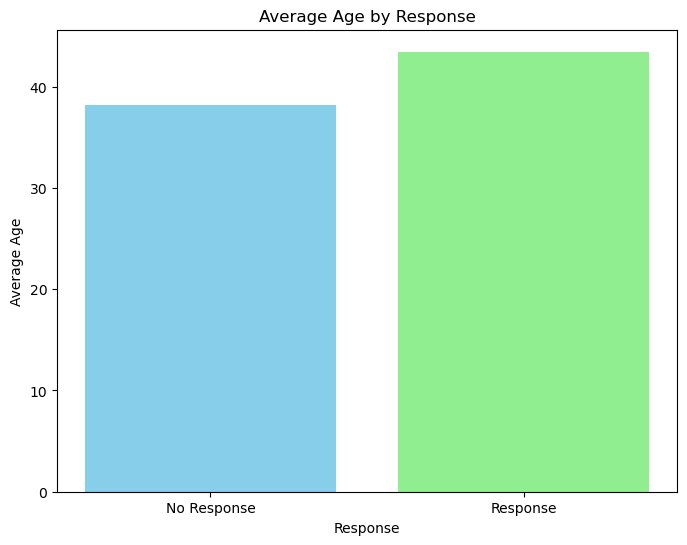

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(average_age_by_response['Response'].astype(str), average_age_by_response['Average Age'], color=['skyblue', 'lightgreen'])
plt.title('Average Age by Response')
plt.xlabel('Response')
plt.ylabel('Average Age')
plt.xticks(ticks=[0, 1], labels=['No Response', 'Response'])
plt.show()

In [10]:
average_age_insured = df.groupby('Previously_Insured')['Age'].mean()

print("Average Age by Previously Insured Status")
print(average_age_insured)

Average Age by Previously Insured Status
Previously_Insured
0    42.45564
1    34.52684
Name: Age, dtype: float64


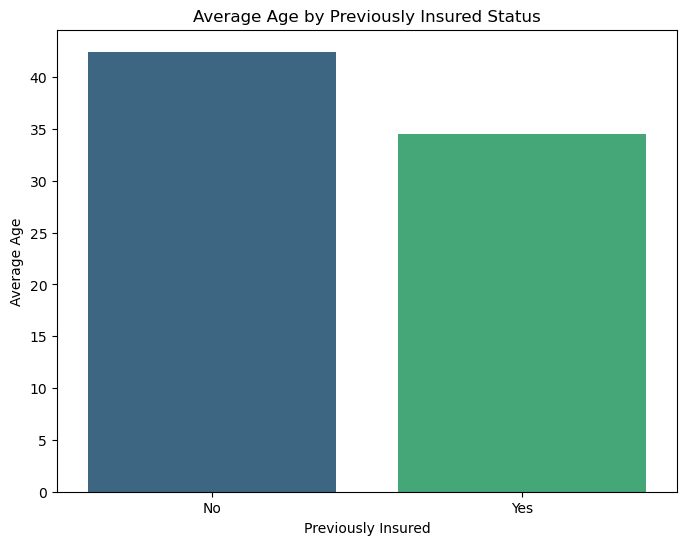

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=average_age_insured.index, y=average_age_insured.values, palette="viridis")
plt.title('Average Age by Previously Insured Status')
plt.xlabel('Previously Insured')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['No', 'Yes'])  # Set x-tick labels to 'No' and 'Yes'
plt.show()

**3. Driving License vs Response**

In [12]:
license_response_count = df.groupby(['Driving_License', 'Response']).size().unstack(fill_value=0)

license_response_percent = license_response_count.div(license_response_count.sum(axis=1), axis=0) * 100

combined_license_df = license_response_count.copy()
combined_license_df['0 (%)'] = license_response_percent[0]
combined_license_df['1 (%)'] = license_response_percent[1]

combined_license_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

print("Count and Percentage of Responses by Driving License")
print(combined_license_df)

Count and Percentage of Responses by Driving License
                 0 (Count)  1 (Count)      0 (%)      1 (%)
Driving_License                                            
0                      771         41  94.950739   5.049261
1                   333628      46669  87.728276  12.271724


<Figure size 1000x600 with 0 Axes>

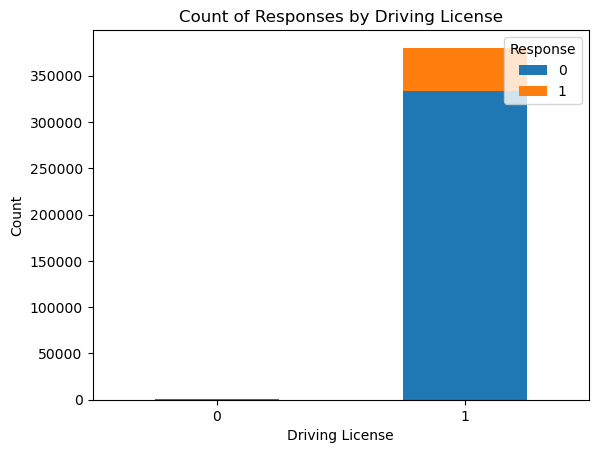

<Figure size 1000x600 with 0 Axes>

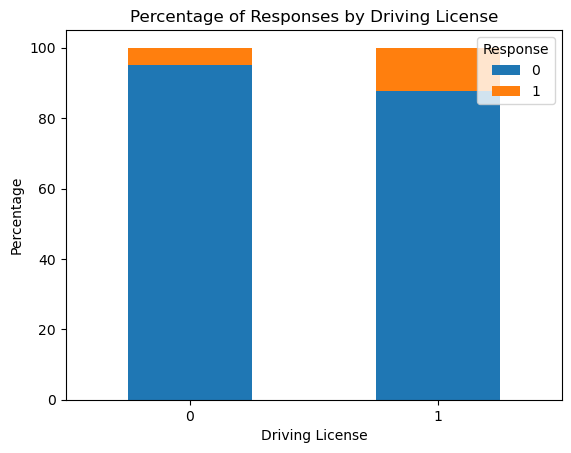

In [13]:
#Counts
plt.figure(figsize=(10, 6))
license_response_count.plot(kind='bar', stacked=True)
plt.title('Count of Responses by Driving License')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

#Prcentages
plt.figure(figsize=(10, 6))
license_response_percent.plot(kind='bar', stacked=True)
plt.title('Percentage of Responses by Driving License')
plt.xlabel('Driving License')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

**4. Region Code vs Response**

In [14]:
region_response_count = df.groupby(['Region_Code', 'Response']).size().unstack(fill_value=0)
region_response_percent = region_response_count.div(region_response_count.sum(axis=1), axis=0) * 100

combined_region_df = region_response_count.copy()
combined_region_df['0 (%)'] = region_response_percent[0]
combined_region_df['1 (%)'] = region_response_percent[1]

combined_region_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']
combined_region_df['Total Count'] = combined_region_df['0 (Count)'] + combined_region_df['1 (Count)']

top_10_combined_region_df = combined_region_df.sort_values(by='Total Count', ascending=False).head(10)
top_10_combined_region_df = top_10_combined_region_df.drop(columns=['Total Count'])

print("Top 10 Region Codes with the Highest Counts of Responses")
print(top_10_combined_region_df)

Top 10 Region Codes with the Highest Counts of Responses
             0 (Count)  1 (Count)      0 (%)      1 (%)
Region_Code                                            
28.0             86498      19917  81.283654  18.716346
8.0              30620       3257  90.385807   9.614193
46.0             17717       2032  89.710871  10.289129
41.0             16039       2224  87.822373  12.177627
15.0             12350        958  92.801323   7.198677
30.0             11291        900  92.617505   7.382495
29.0              9700       1365  87.663805  12.336195
50.0              9601        642  93.732305   6.267695
3.0               8070       1181  87.233813  12.766187
11.0              8191       1041  88.724003  11.275997


In [16]:
region_response_count = df.groupby(['Region_Code', 'Response']).size().unstack(fill_value=0)
region_response_percent = region_response_count.div(region_response_count.sum(axis=1), axis=0) * 100

combined_region_df = region_response_count.copy()
combined_region_df['0 (%)'] = region_response_percent[0]
combined_region_df['1 (%)'] = region_response_percent[1]

combined_region_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

top_10_combined_region_df = combined_region_df.sort_values(by='1 (%)', ascending=False).head(10)

print("Top 10 Region Codes with the Highest Percentage of Responses 1")
print(top_10_combined_region_df)

Top 10 Region Codes with the Highest Percentage of Responses 1
             0 (Count)  1 (Count)      0 (%)      1 (%)
Region_Code                                            
38.0              1637        389  80.799605  19.200395
28.0             86498      19917  81.283654  18.716346
19.0              1285        250  83.713355  16.286645
4.0               1516        285  84.175458  15.824542
23.0              1660        300  84.693878  15.306122
51.0               155         28  84.699454  15.300546
24.0              2073        342  85.838509  14.161491
7.0               2847        432  86.825252  13.174748
18.0              4475        678  86.842616  13.157384
3.0               8070       1181  87.233813  12.766187


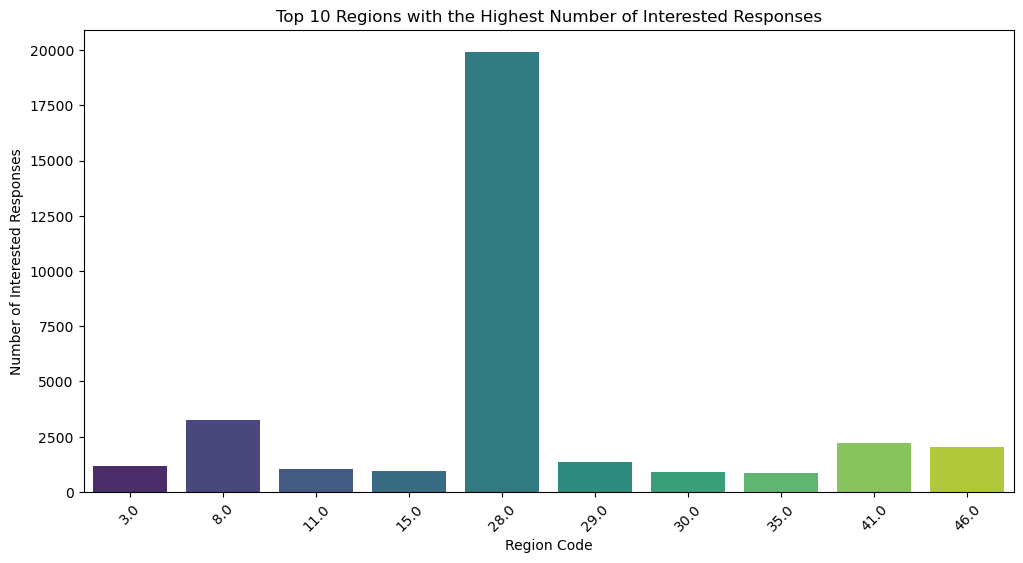

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_regions_interested.index, y=top_10_regions_interested[1], palette="viridis")
plt.title('Top 10 Regions with the Highest Number of Interested Responses')
plt.xlabel('Region Code')
plt.ylabel('Number of Interested Responses')
plt.xticks(rotation=45)
plt.show()

**5. Previously Insured - Response**

In [15]:
insurance_response_count = df.groupby(['Previously_Insured', 'Response']).size().unstack(fill_value=0)
insurance_response_percent = insurance_response_count.div(insurance_response_count.sum(axis=1), axis=0) * 100

combined_insurance_df = insurance_response_count.copy()
combined_insurance_df['0 (%)'] = insurance_response_percent[0]
combined_insurance_df['1 (%)'] = insurance_response_percent[1]

combined_insurance_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

print("Count and Percentage of Responses by Previously Insured")
print(combined_insurance_df)

Count and Percentage of Responses by Previously Insured
                    0 (Count)  1 (Count)      0 (%)      1 (%)
Previously_Insured                                            
0                      159929      46552  77.454584  22.545416
1                      174470        158  99.909522   0.090478


<Figure size 1000x600 with 0 Axes>

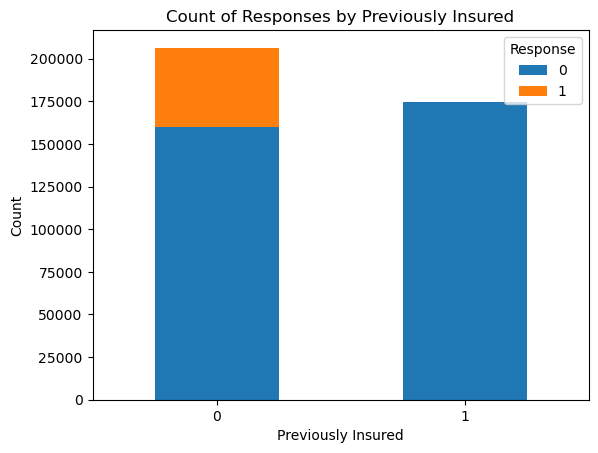

<Figure size 1000x600 with 0 Axes>

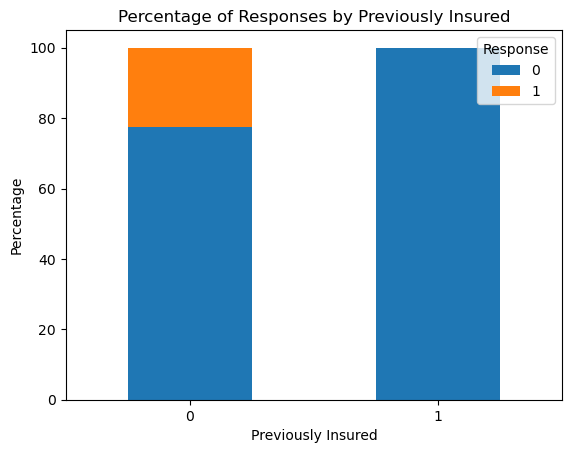

In [22]:
#Counts
plt.figure(figsize=(10, 6))
insurance_response_count.plot(kind='bar', stacked=True)
plt.title('Count of Responses by Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

#Percentages
plt.figure(figsize=(10, 6))
insurance_response_percent.plot(kind='bar', stacked=True)
plt.title('Percentage of Responses by Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

**6. Vehicle Age, Previously insured, and Response**

In [23]:
vehicle_age_response_count = df.groupby(['Vehicle_Age', 'Response']).size().unstack(fill_value=0)
vehicle_age_response_percent = vehicle_age_response_count.div(vehicle_age_response_count.sum(axis=1), axis=0) * 100

combined_vehicle_age_df = vehicle_age_response_count.copy()
combined_vehicle_age_df['0 (%)'] = vehicle_age_response_percent[0]
combined_vehicle_age_df['1 (%)'] = vehicle_age_response_percent[1]

combined_vehicle_age_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

print("Count and Percentage of Responses by Vehicle Age")
print(combined_vehicle_age_df)

Count and Percentage of Responses by Vehicle Age
             0 (Count)  1 (Count)      0 (%)      1 (%)
Vehicle_Age                                            
1-2 Year        165510      34806  82.624453  17.375547
< 1 Year        157584       7202  95.629483   4.370517
> 2 Years        11305       4702  70.625351  29.374649


<Figure size 1000x600 with 0 Axes>

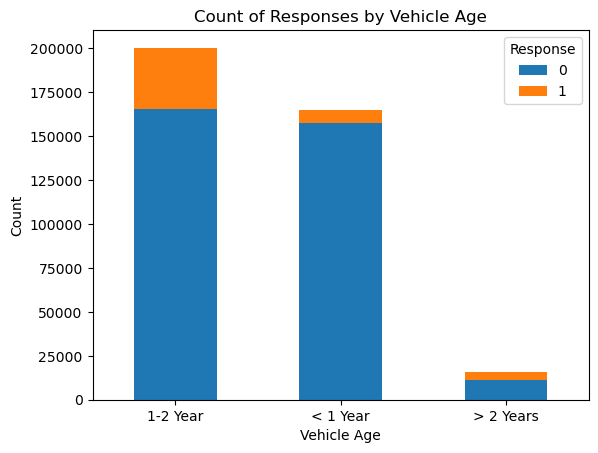

<Figure size 1000x600 with 0 Axes>

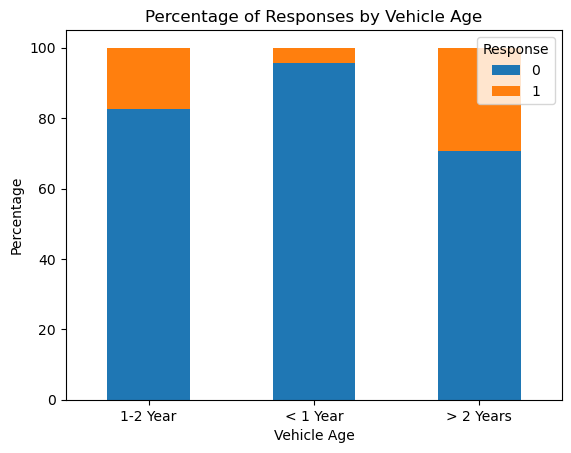

In [24]:
#Counts
plt.figure(figsize=(10, 6))
vehicle_age_response_count.plot(kind='bar', stacked=True)
plt.title('Count of Responses by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

#Percentages
plt.figure(figsize=(10, 6))
vehicle_age_response_percent.plot(kind='bar', stacked=True)
plt.title('Percentage of Responses by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Response', loc='upper right')
plt.show()

In [35]:
vehicle_age_insured_response = pd.crosstab([df['Vehicle_Age'], df['Previously_Insured']], df['Response'])

print("Cross-Tabulation of Vehicle Age, Previously Insured, and Response")
print(vehicle_age_insured_response)

Cross-Tabulation of Vehicle Age, Previously Insured, and Response
Response                             0      1
Vehicle_Age Previously_Insured               
1-2 Year    0                   100280  34711
            1                    65230     95
< 1 Year    0                    48389   7140
            1                   109195     62
> 2 Years   0                    11260   4701
            1                       45      1


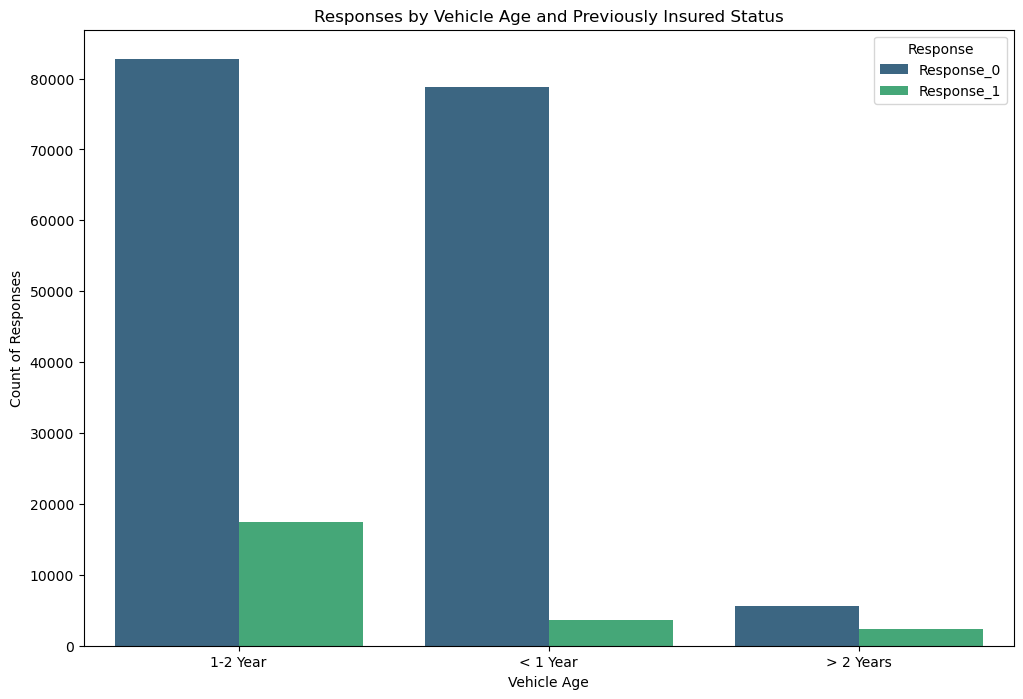

In [44]:
vehicle_age_insured_response_reset.columns = ['Vehicle_Age', 'Previously_Insured', 'Response_0', 'Response_1']

vehicle_age_insured_response_melted = vehicle_age_insured_response_reset.melt(
    id_vars=['Vehicle_Age', 'Previously_Insured'], 
    value_vars=['Response_0', 'Response_1'], 
    var_name='Response', 
    value_name='Count'
)

vehicle_age_insured_response_melted['Response'] = vehicle_age_insured_response_melted['Response'].astype('category')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=vehicle_age_insured_response_melted, 
    x='Vehicle_Age', 
    y='Count', 
    hue='Response', 
    palette="viridis", 
    errorbar=None
)
plt.title('Responses by Vehicle Age and Previously Insured Status')
plt.xlabel('Vehicle Age')
plt.ylabel('Count of Responses')
plt.legend(title='Response')
plt.show()

**7. Vehicle Damage, Previously Insured, and Response**

In [87]:
vehicle_damage_insured_response = pd.crosstab([df['Vehicle_Damage'], df['Previously_Insured']], df['Response'])

print("Cross-Tabulation of Vehicle Damage, Previously Insured, and Response")
print(vehicle_damage_insured_response)

Cross-Tabulation of Vehicle Damage, Previously Insured, and Response
Response                                0      1
Vehicle_Damage Previously_Insured               
No             0                    23080    910
               1                   164634     72
Yes            0                   136849  45642
               1                     9836     86


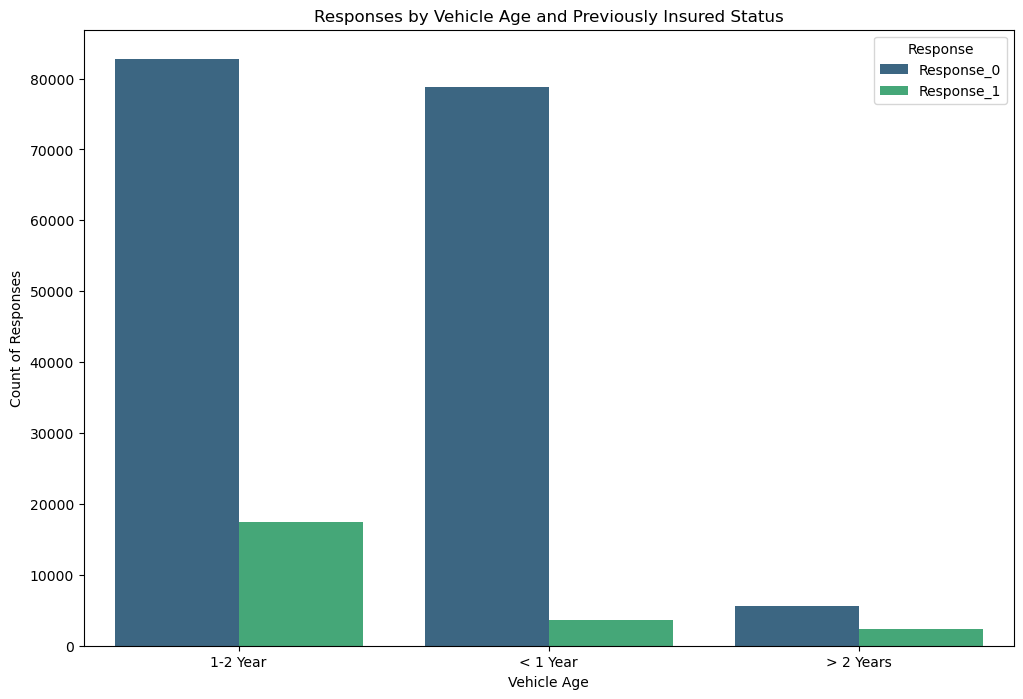

In [88]:
vehicle_age_insured_response_melted['Response'] = vehicle_age_insured_response_melted['Response'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=vehicle_age_insured_response_melted, 
    x='Vehicle_Age', 
    y='Count', 
    hue='Response', 
    palette="viridis", 
    errorbar=None
)
plt.title('Responses by Vehicle Age and Previously Insured Status')
plt.xlabel('Vehicle Age')
plt.ylabel('Count of Responses')
plt.legend(title='Response')
plt.show()

**8. Annual Premium - Response**

In [57]:
average_premium_response = df.groupby('Response')['Annual_Premium'].mean()

print("Average Annual Premium by Response:")
print(average_premium_response)

Average Annual Premium by Response:
Response
0    30419.160276
1    31604.092742
Name: Annual_Premium, dtype: float64


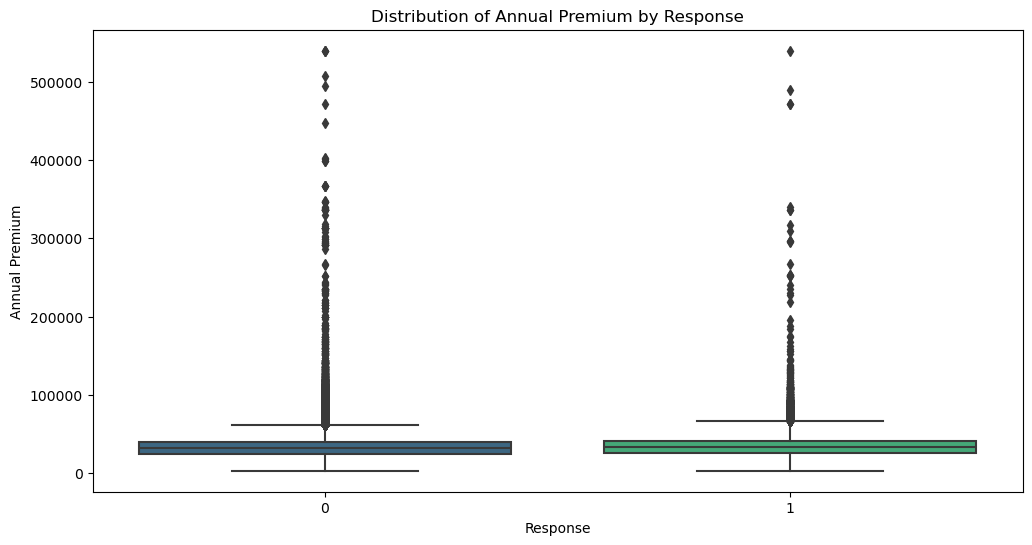

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Response', y='Annual_Premium', palette="viridis")
plt.title('Distribution of Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.show()

**9. Policy Sales Channel - Response**

In [70]:
sales_channel_response_count = df.groupby(['Policy_Sales_Channel', 'Response']).size().unstack(fill_value=0)

sales_channel_response_percent = sales_channel_response_count.div(sales_channel_response_count.sum(axis=1), axis=0) * 100

combined_sales_channel_df = sales_channel_response_count.copy()
combined_sales_channel_df['0 (%)'] = sales_channel_response_percent[0]
combined_sales_channel_df['1 (%)'] = sales_channel_response_percent[1]

combined_sales_channel_df.columns = ['0 (Count)', '1 (Count)', '0 (%)', '1 (%)']

combined_sales_channel_df['Total Count'] = combined_sales_channel_df['0 (Count)'] + combined_sales_channel_df['1 (Count)']
combined_sales_channel_df = combined_sales_channel_df.sort_values(by='Total Count', ascending=False)

print("Count and Percentage of Responses by Policy Sales Channel (Top Channels):")
print(combined_sales_channel_df.head(10))

Count and Percentage of Responses by Policy Sales Channel (Top Channels):
                      0 (Count)  1 (Count)      0 (%)      1 (%)  Total Count
Policy_Sales_Channel                                                         
152.0                    130926       3858  97.137642   2.862358       134784
26.0                      63809      15891  80.061481  19.938519        79700
124.0                     59999      13996  81.085208  18.914792        73995
160.0                     21304        475  97.819000   2.181000        21779
156.0                      8364       2297  78.454179  21.545821        10661
122.0                      8210       1720  82.678751  17.321249         9930
157.0                      4890       1794  73.159785  26.840215         6684
154.0                      4519       1474  75.404639  24.595361         5993
151.0                      3763        122  96.859717   3.140283         3885
163.0                      2013        880  69.581749  30.418251    

In [89]:
top_count_channels = combined_sales_channel_df.sort_values(by='Total Count', ascending=False).head(10)

print("Top 10 Policy Sales Channels by Count of Responses:")
print(top_count_channels[['0 (Count)', '1 (Count)', 'Total Count']])

Top 10 Policy Sales Channels by Count of Responses:
                      0 (Count)  1 (Count)  Total Count
Policy_Sales_Channel                                   
152.0                    130926       3858       134784
26.0                      63809      15891        79700
124.0                     59999      13996        73995
160.0                     21304        475        21779
156.0                      8364       2297        10661
122.0                      8210       1720         9930
157.0                      4890       1794         6684
154.0                      4519       1474         5993
151.0                      3763        122         3885
163.0                      2013        880         2893


In [64]:
top_1_percent_channels = combined_sales_channel_df.sort_values(by='1 (%)', ascending=False).head(10)

print("Top 10 Policy Sales Channels by Percentage of '1' (Interested) Responses:")
print(top_1_percent_channels[['1 (%)']])

top_0_percent_channels = combined_sales_channel_df.sort_values(by='0 (%)', ascending=False).head(10)

print("\nTop 10 Policy Sales Channels by Percentage of '0' (Not Interested) Responses:")
print(top_0_percent_channels[['0 (%)']])

Top 10 Policy Sales Channels by Percentage of '1' (Interested) Responses:
                           1 (%)
Policy_Sales_Channel            
43.0                  100.000000
123.0                 100.000000
27.0                   33.333333
28.0                   33.333333
36.0                   32.692308
155.0                  32.009724
163.0                  30.418251
3.0                    30.401530
121.0                  29.687500
81.0                   28.571429

Top 10 Policy Sales Channels by Percentage of '0' (Not Interested) Responses:
                      0 (%)
Policy_Sales_Channel       
143.0                 100.0
117.0                 100.0
83.0                  100.0
82.0                  100.0
71.0                  100.0
126.0                 100.0
104.0                 100.0
79.0                  100.0
99.0                  100.0
118.0                 100.0


In [53]:
sales_channel_response = pd.crosstab(index=df['Policy_Sales_Channel'], columns=df['Response'], normalize='columns')

sorted_sales_channel_response = sales_channel_response.sort_values(by=1, ascending=False).head(10)

print("Top 10 Policy Sales Channels by Percentage of '1' (Interested) Responses:")
print(sorted_sales_channel_response)

Top 10 Policy Sales Channels by Percentage of '1' (Interested) Responses:
Response                     0         1
Policy_Sales_Channel                    
26.0                  0.190817  0.340206
124.0                 0.179423  0.299636
152.0                 0.391526  0.082595
156.0                 0.025012  0.049176
157.0                 0.014623  0.038407
122.0                 0.024552  0.036823
154.0                 0.013514  0.031556
163.0                 0.006020  0.018840
160.0                 0.063708  0.010169
155.0                 0.002509  0.008456


In [54]:
sales_channel_response = pd.crosstab(index=df['Policy_Sales_Channel'], columns=df['Response'], normalize='columns')

sorted_sales_channel_response = sales_channel_response.sort_values(by=0, ascending=False).head(10)

print("Top 10 Policy Sales Channels by Percentage of '0' (Not Interested) Responses:")
print(sorted_sales_channel_response)

Top 10 Policy Sales Channels by Percentage of '0' (Not Interested) Responses:
Response                     0         1
Policy_Sales_Channel                    
152.0                 0.391526  0.082595
26.0                  0.190817  0.340206
124.0                 0.179423  0.299636
160.0                 0.063708  0.010169
156.0                 0.025012  0.049176
122.0                 0.024552  0.036823
157.0                 0.014623  0.038407
154.0                 0.013514  0.031556
151.0                 0.011253  0.002612
163.0                 0.006020  0.018840


**10. Vintage - Response**

In [51]:
average_vintage_response = df.groupby('Response')['Vintage'].mean()

print("Average Vintage by Response")
print(average_vintage_response)

Average Vintage by Response
Response
0    154.380243
1    154.112246
Name: Vintage, dtype: float64


**11. Premium Bin, Previously Insured, and Response**

Cross-Tabulation of Premium Bin, Previously Insured, and Response
Response                                0      1
Premium_Bin    Previously_Insured               
Extremely High 0                   115355  34781
               1                   129902    108
High           0                     1636    432
               1                     3350      0
Low            0                        1      1
               1                        3      0
Medium         0                      125     24
               1                      236      0
Very High      0                     9876   2845
               1                    17543     14
Very Low       0                    32936   8469
               1                    23436     36

Percentage Table of Premium Bin, Previously Insured, and Response
Response                                    0          1
Premium_Bin    Previously_Insured                       
Extremely High 0                    76.833671  23.166329
          

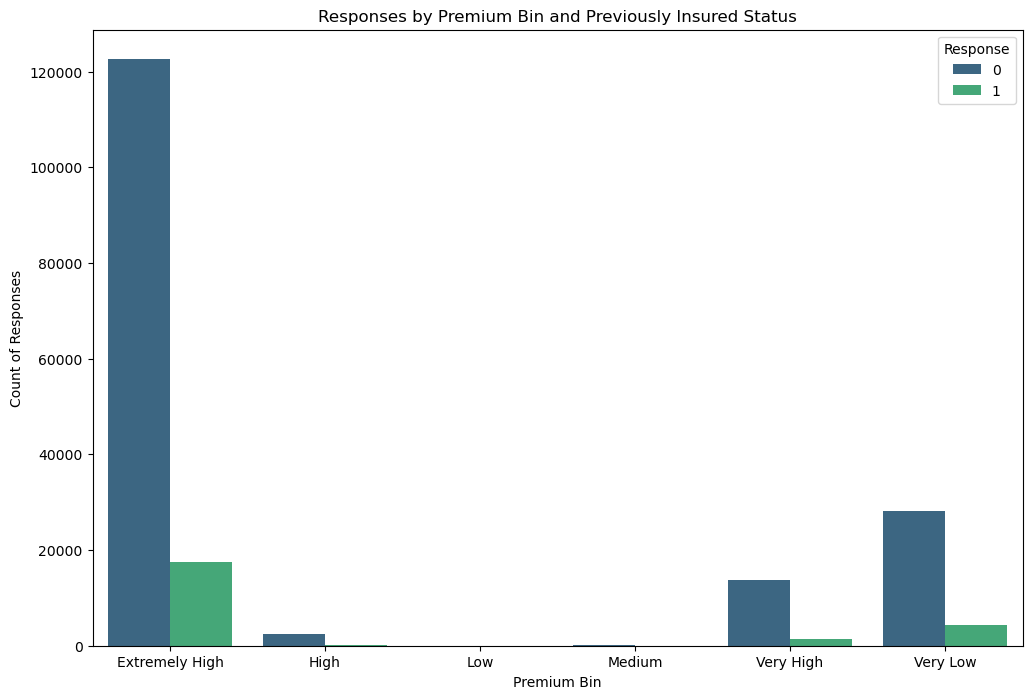

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create the cross-tabulation
premium_bin_insured_response = pd.crosstab([df['Premium_Bin'], df['Previously_Insured']], df['Response'])

print("Cross-Tabulation of Premium Bin, Previously Insured, and Response")
print(premium_bin_insured_response)

# Calculate the percentage
premium_bin_insured_response_percentage = premium_bin_insured_response.div(premium_bin_insured_response.sum(axis=1), axis=0) * 100

print("\nPercentage Table of Premium Bin, Previously Insured, and Response")
print(premium_bin_insured_response_percentage)

# Prepare data for plotting
premium_bin_insured_response_melted = premium_bin_insured_response.reset_index()
premium_bin_insured_response_melted = premium_bin_insured_response_melted.melt(
    id_vars=['Premium_Bin', 'Previously_Insured'],
    value_vars=[0, 1],
    var_name='Response',
    value_name='Count'
)

# Ensure 'Response' is a string to prevent issues
premium_bin_insured_response_melted['Response'] = premium_bin_insured_response_melted['Response'].astype(str)
premium_bin_insured_response_melted['Previously_Insured'] = premium_bin_insured_response_melted['Previously_Insured'].astype(str)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=premium_bin_insured_response_melted, 
    x='Premium_Bin', 
    y='Count', 
    hue='Response', 
    palette="viridis", 
    errorbar=None
)
plt.title('Responses by Premium Bin and Previously Insured Status')
plt.xlabel('Premium Bin')
plt.ylabel('Count of Responses')
plt.legend(title='Response')
plt.show()


**12. Age Generation**

Cross-Tabulation of Vehicle Damage by Age Generation and Response
Response                           0      1
Vehicle_Damage Age_Generation              
0              0               61961    201
               1               68682    438
               2               32571    269
               3               21424     72
               4                3076      2
1              0               28595   3112
               1               32988  13479
               2               50777  21325
               3               30346   7311
               4                3979    501

Percentage Table of Vehicle Damage by Age Generation and Response
Response                               0          1
Vehicle_Damage Age_Generation                      
0              0               99.676651   0.323349
               1               99.366319   0.633681
               2               99.180877   0.819123
               3               99.665054   0.334946
               4           

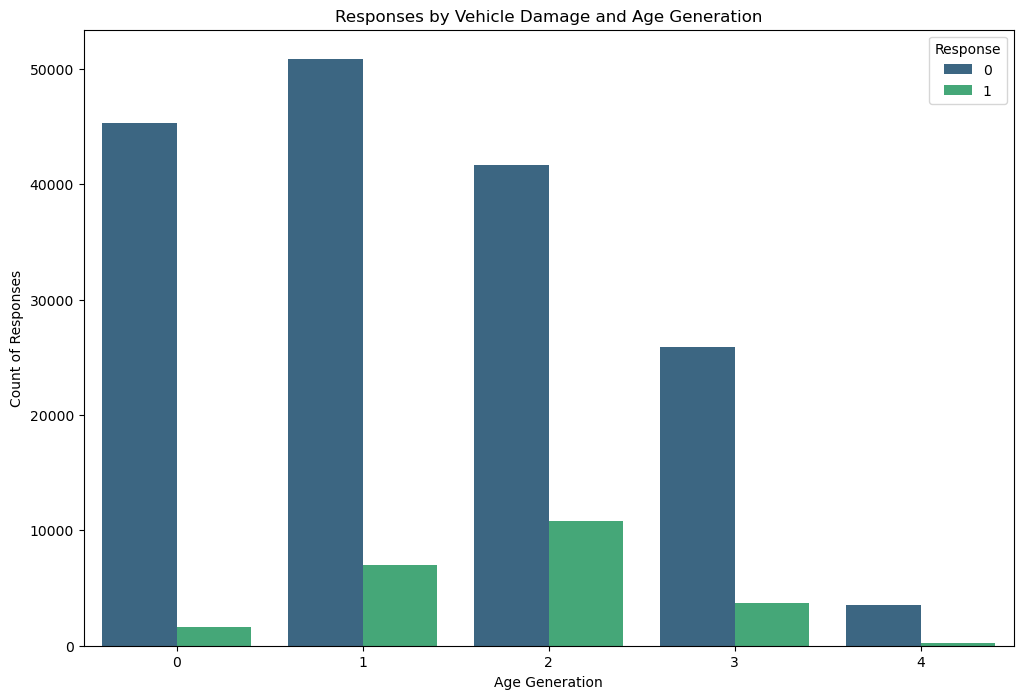

In [18]:
vehicle_damage_generation_response = pd.crosstab([df['Vehicle_Damage'], df['Age_Generation']], df['Response'])

print("Cross-Tabulation of Vehicle Damage by Age Generation and Response")
print(vehicle_damage_generation_response)

vehicle_damage_generation_response_percentage = vehicle_damage_generation_response.div(vehicle_damage_generation_response.sum(axis=1), axis=0) * 100

print("\nPercentage Table of Vehicle Damage by Age Generation and Response")
print(vehicle_damage_generation_response_percentage)

vehicle_damage_generation_response_melted = vehicle_damage_generation_response.reset_index()
vehicle_damage_generation_response_melted = vehicle_damage_generation_response_melted.melt(
    id_vars=['Vehicle_Damage', 'Age_Generation'],
    value_vars=[0, 1],
    var_name='Response',
    value_name='Count'
)

vehicle_damage_generation_response_melted['Response'] = vehicle_damage_generation_response_melted['Response'].astype(str)
vehicle_damage_generation_response_melted['Age_Generation'] = vehicle_damage_generation_response_melted['Age_Generation'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=vehicle_damage_generation_response_melted, 
    x='Age_Generation', 
    y='Count', 
    hue='Response', 
    palette="viridis", 
    errorbar=None
)
plt.title('Responses by Vehicle Damage and Age Generation')
plt.xlabel('Age Generation')
plt.ylabel('Count of Responses')
plt.legend(title='Response')
plt.show()

Cross-Tabulation of Age Generation, Previously Insured, and Response
Response                               0      1
Age_Generation Previously_Insured              
0              0                   32023   3279
               1                   58533     34
1              0                   37849  13848
               1                   63821     69
2              0                   54423  21552
               1                   28925     42
3              0                   31532   7371
               1                   20238     12
4              0                    4102    502
               1                    2953      1

Percentage Table of Age Generation, Previously Insured, and Response
Response                                   0          1
Age_Generation Previously_Insured                      
0              0                   90.711574   9.288426
               1                   99.941947   0.058053
1              0                   73.213146  26.786854
     

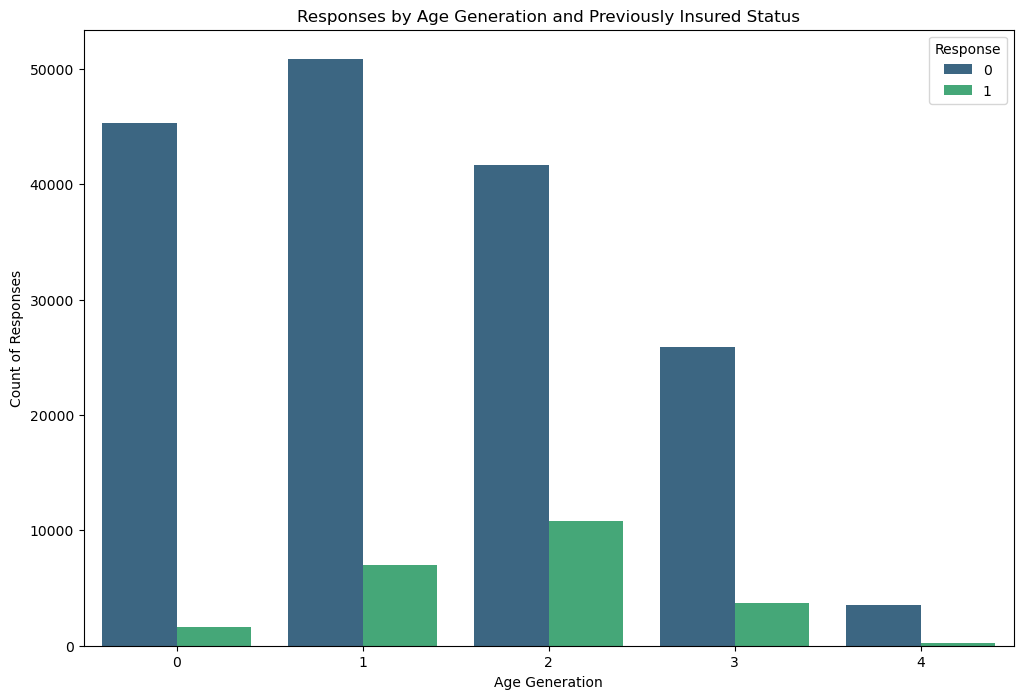

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create the cross-tabulation
generation_insured_response = pd.crosstab([df['Age_Generation'], df['Previously_Insured']], df['Response'])

print("Cross-Tabulation of Age Generation, Previously Insured, and Response")
print(generation_insured_response)

# Calculate the percentage
generation_insured_response_percentage = generation_insured_response.div(generation_insured_response.sum(axis=1), axis=0) * 100

print("\nPercentage Table of Age Generation, Previously Insured, and Response")
print(generation_insured_response_percentage)

# Prepare data for plotting
generation_insured_response_melted = generation_insured_response.reset_index()
generation_insured_response_melted = generation_insured_response_melted.melt(
    id_vars=['Age_Generation', 'Previously_Insured'],
    value_vars=[0, 1],
    var_name='Response',
    value_name='Count'
)

# Ensure 'Response' is a string to prevent issues
generation_insured_response_melted['Response'] = generation_insured_response_melted['Response'].astype(str)
generation_insured_response_melted['Previously_Insured'] = generation_insured_response_melted['Previously_Insured'].astype(str)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=generation_insured_response_melted, 
    x='Age_Generation', 
    y='Count', 
    hue='Response', 
    palette="viridis", 
    errorbar=None
)
plt.title('Responses by Age Generation and Previously Insured Status')
plt.xlabel('Age Generation')
plt.ylabel('Count of Responses')
plt.legend(title='Response')
plt.show()


Vehicle Age and Age Generation
Age_Generation      0      1      2      3     4
Vehicle_Age                                     
0               91173  72957    470    175    11
1                2664  41668  97179  52131  6674
2                  32    962   7293   6847   873

Percentage Table of Vehicle Age and Age Generation
Age_Generation          0          1          2          3         4
Vehicle_Age                                                         
0               55.328123  44.273785   0.285218   0.106198  0.006675
1                1.329899  20.801134  48.512850  26.024381  3.331736
2                0.199913   6.009871  45.561317  42.775036  5.453864


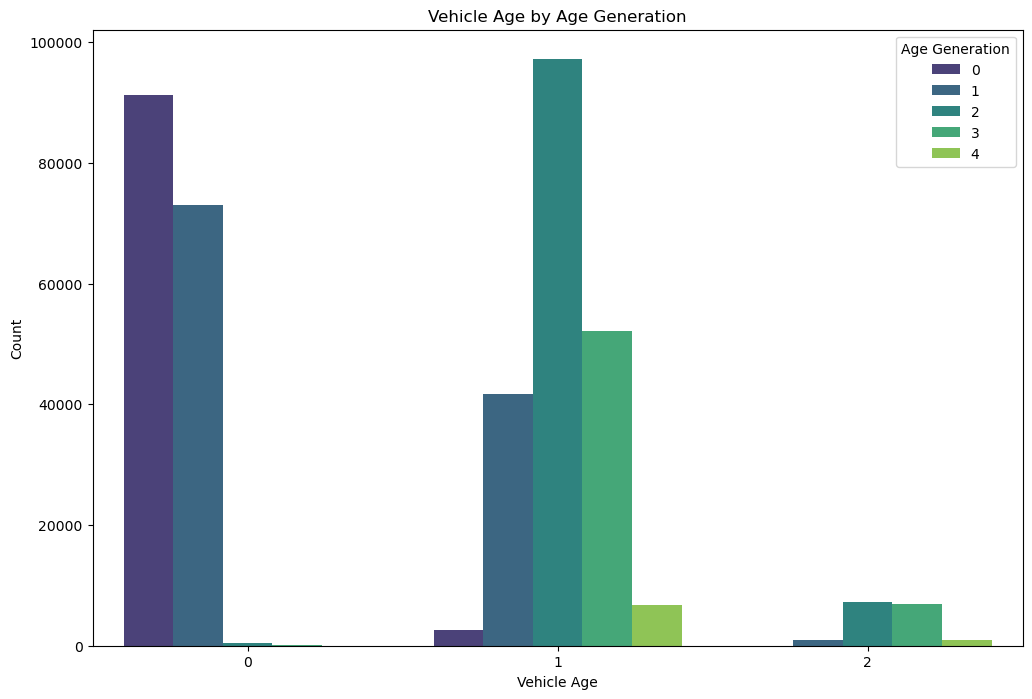

In [16]:
vehicle_age_generation = pd.crosstab(df['Vehicle_Age'], df['Age_Generation'])

print("Vehicle Age and Age Generation")
print(vehicle_age_generation)

vehicle_age_generation_percentage = vehicle_age_generation.div(vehicle_age_generation.sum(axis=1), axis=0) * 100

print("\nPercentage Table of Vehicle Age and Age Generation")
print(vehicle_age_generation_percentage)

vehicle_age_generation_melted = vehicle_age_generation.reset_index()
vehicle_age_generation_melted = vehicle_age_generation_melted.melt(
    id_vars=['Vehicle_Age'],
    var_name='Age_Generation',
    value_name='Count'
)

vehicle_age_generation_melted['Age_Generation'] = vehicle_age_generation_melted['Age_Generation'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=vehicle_age_generation_melted, 
    x='Vehicle_Age', 
    y='Count', 
    hue='Age_Generation', 
    palette="viridis", 
    errorbar=None
)
plt.title('Vehicle Age by Age Generation')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Age Generation')
plt.show()

**13. Product**

Top 10 Products with Response 1:
                                               Product  Count
0    Chiropractic Care Coverage, Home Healthcare Se...    491
125  Occupational Therapy Coverage, Speech Therapy ...    491
5    Chiropractic Care Coverage, Home Healthcare Se...    434
100  Mental Health Coverage, Dental Exams and Clean...    434
25   Critical Illness Coverage, Vision Exams and Ey...    411
171  Preventive Services, Occupational Therapy Cove...    411
52   Emergency Room Visits, Physical Therapy Covera...    411
151  Prescription Drugs Coverage, Occupational Ther...    411
153  Prescription Drugs Coverage, Pediatric Service...    411
31   Dental Exams and Cleanings, Maternity and Newb...    411


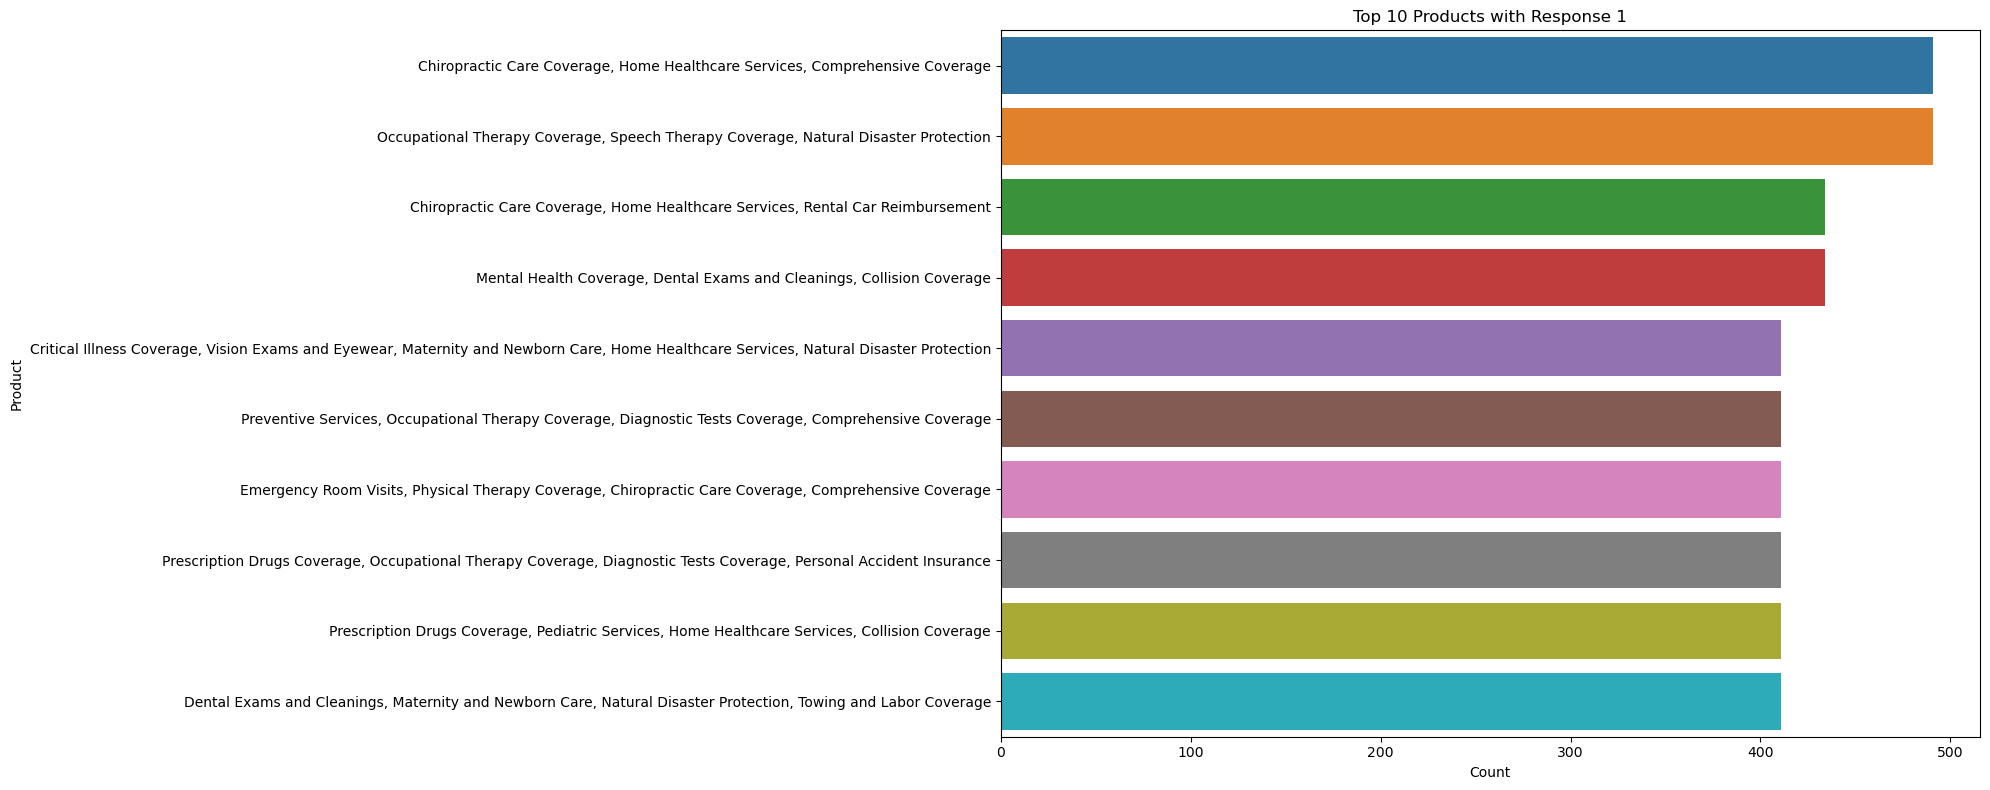

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame named 'df'
# Extracting relevant columns for analysis
product_response = df[df['Response'] == 1][['Product', 'Response']]

# Counting occurrences of each product when Response is 1
product_response_counts = product_response.groupby('Product').size().reset_index(name='Count')

# Sorting by count in descending order and selecting top 10 if needed
top_product_response = product_response_counts.sort_values(by='Count', ascending=False).head(10)

# Displaying the top 10 table
print("Top 10 Products with Response 1:")
print(top_product_response)

# Plotting the distribution of products with Response 1 using a horizontal bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x='Count', y='Product', data=top_product_response, orient='h')
plt.title('Top 10 Products with Response 1')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


**14. Year**


Response Counts and Percentages by Year:
   Year Response  Count  Percent
0  2019        0  67878    87.90
1  2019        1   9342    12.10
2  2020        0  65880    87.58
3  2020        1   9342    12.42
4  2021        0  72640    88.60
5  2021        1   9342    11.40
6  2022        0  61120    86.74
7  2022        1   9342    13.26
8  2023        0  66881    87.74
9  2023        1   9342    12.26


C:\Users\Quoc Khang\AppData\Local\Temp\ipykernel_22180\425274876.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Count', hue='Response', data=year_response_counts, palette='viridis', ci=None)


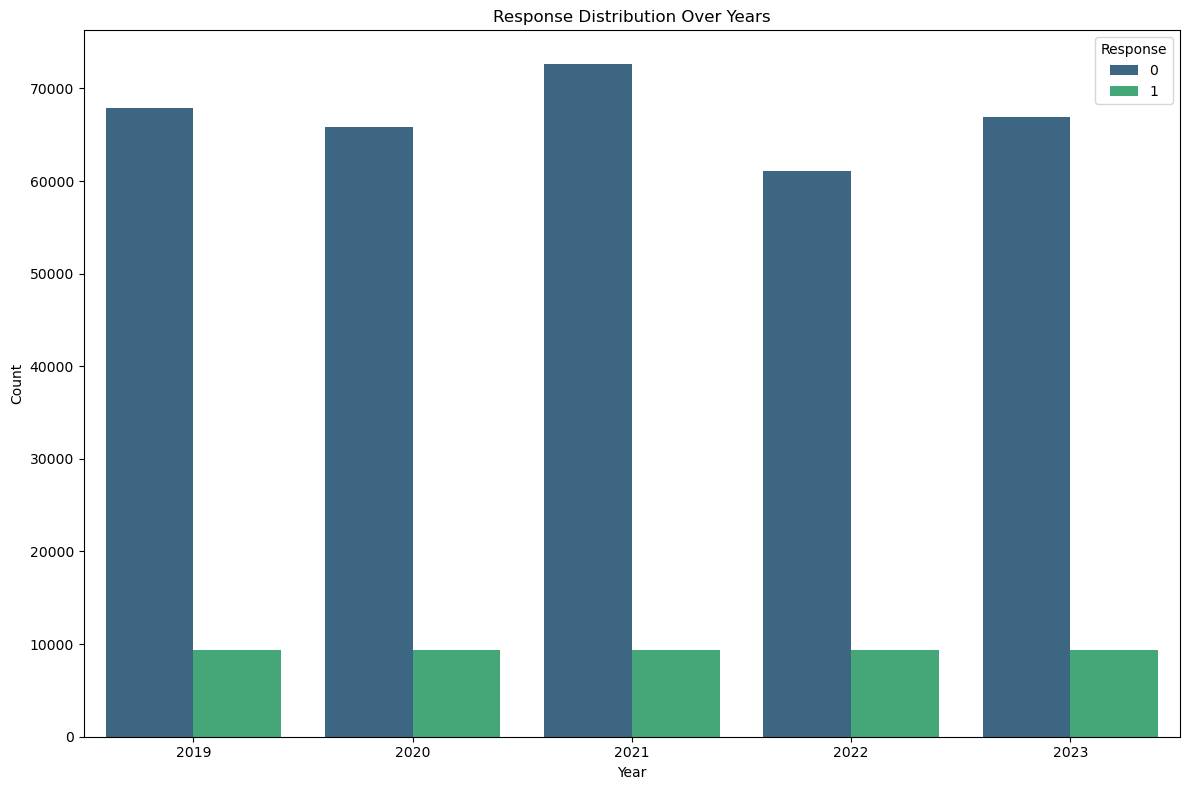

In [52]:
year_response = df[['Year', 'Response']].copy()
year_response['Response'] = year_response['Response'].astype(str)
year_response_counts = year_response.groupby(['Year', 'Response']).size().reset_index(name='Count')
year_total_counts = year_response_counts.groupby('Year')['Count'].sum().reset_index(name='Total')
year_response_counts = pd.merge(year_response_counts, year_total_counts, on='Year', how='left')
year_response_counts['Percent'] = year_response_counts['Count'] / year_response_counts['Total'] * 100
year_response_counts['Percent'] = year_response_counts['Percent'].round(2)
print("\nResponse Counts and Percentages by Year:")
print(year_response_counts[['Year', 'Response', 'Count', 'Percent']])

plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Count', hue='Response', data=year_response_counts, palette='viridis', ci=None)
plt.title('Response Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Response')
plt.tight_layout()
plt.show()

**15. Correlation Matrix Analysis of Key Variables**

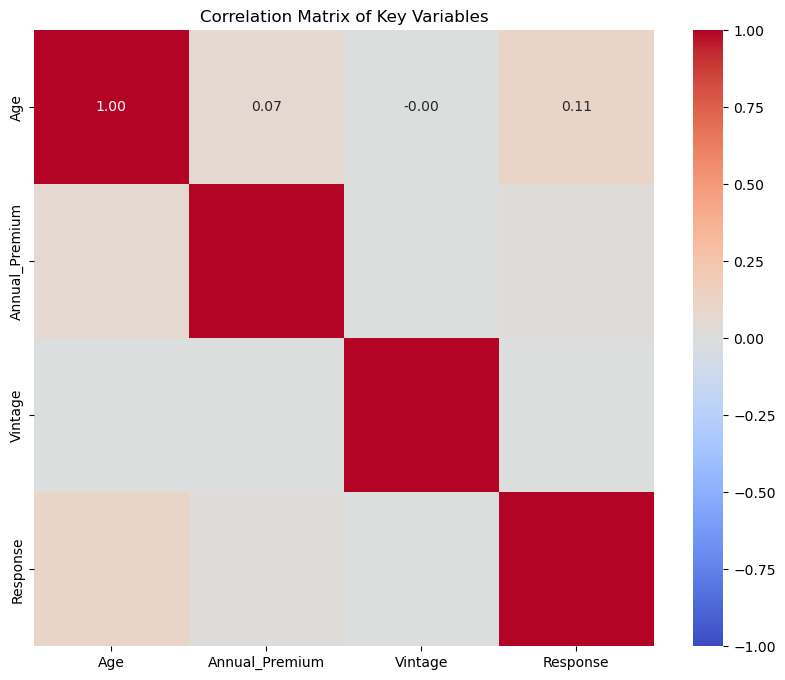

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with relevant columns
# Selecting key numeric variables for correlation analysis
key_variables = ['Age', 'Annual_Premium', 'Vintage', 'Response']

# Subset the DataFrame with selected variables
df_selected = df[key_variables]

# Calculate correlation matrix
corr_matrix = df_selected.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()


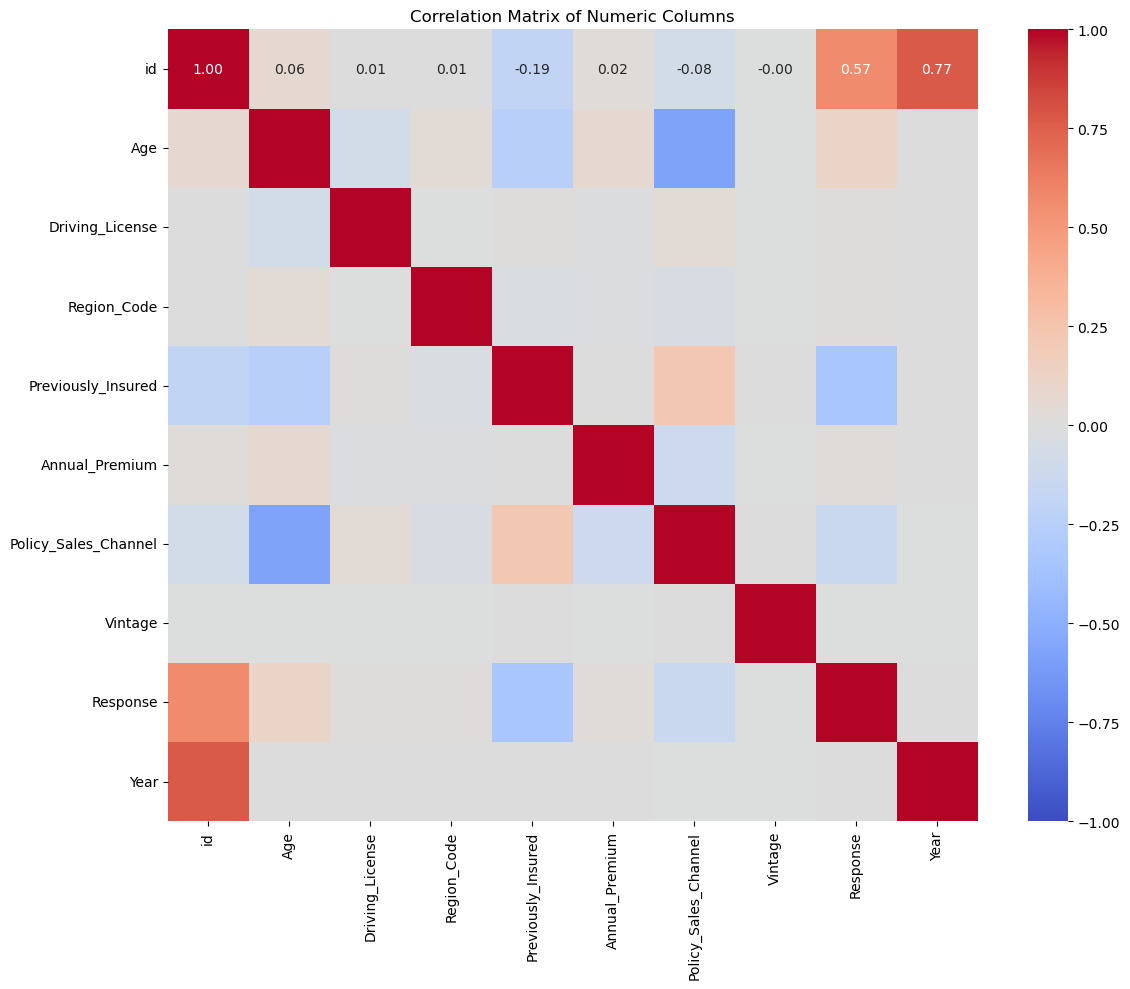

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with all columns including non-numeric ones
# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()
